# Análise exploratória de dados

## Importação das bibliotecas

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import seaborn as sns

sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette("Set2"))

## 1. Descrição dos dados

In [2]:
# Leitura dos dados para um DataFrame

df = pd.read_csv('../data/raw/Sleep_Efficiency.csv')
df.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
# Estatisticas descritivas dos dados do DataFrame

df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


### 1.1 Observações

#### Registros

- **Amostra**: 452 indivíduos.
- **Idade Média**: 40,29 anos (9 a 69 anos).
- **Duração Média do Sono**: 7,47 horas (5 a 10 horas).
- **Eficiência Média do Sono**: 78,89% (50% a 99%).
- **Percentual Médio de Sono REM**: 22,62% (15% a 30%).
- **Percentual Médio de Sono Profundo**: 52,82% (18% a 75%).
- **Percentual Médio de Sono Leve**: 24,56% (7% a 63%).
- **Média de Despertares**: 1,64 vezes por noite (0 a 4 vezes).
- **Consumo Médio de Cafeína**: 23,65 unidades (0 a 200 unidades).
- **Consumo Médio de Álcool**: 1,17 unidades (0 a 5 unidades).
- **Frequência Média de Exercícios**: 1,79 vezes por semana (0 a 5 vezes).

#### Observações adicionais sobre a distribuição:
- **Idade Mediana**: 40 anos.
- **Duração Mediana do Sono**: 7,5 horas.
- **Eficiência Mediana do Sono**: 82%.
- **Mediana de Sono REM**: 22%.
- **Mediana de Sono Profundo**: 58%.
- **Mediana de Sono Leve**: 18%.
- **Mediana de Despertares**: 1 vez.
- **Mediana de Consumo de Cafeína**: 25 unidades.
- **Mediana de Consumo de Álcool**: 0 unidades.
- **Mediana de Frequência de Exercícios**: 2 vezes por semana.


### Descrição

Este conjunto de dados, extraído da plataforma Kaggle, contém informações sobre os hábitos de sono de várias pessoas, cada uma identificada por um ID único. Os dados abrangem idade, gênero, horários de dormir e acordar, duração do sono, eficiência do sono, porcentagens de sono REM, profundo e leve, número de despertares, consumo de cafeína e álcool antes de dormir, status de fumante e frequência de exercícios.

A variável alvo é a eficiência do sono. As variáveis que podem afetar essa eficiência incluem ID, idade, gênero, horário de dormir, horário de acordar, duração do sono, porcentagem de sono REM, porcentagem de sono profundo, porcentagem de sono leve, número de despertares, consumo de cafeína, consumo de álcool, status de fumante e frequência de exercícios.


### 1.2 Dados Faltantes

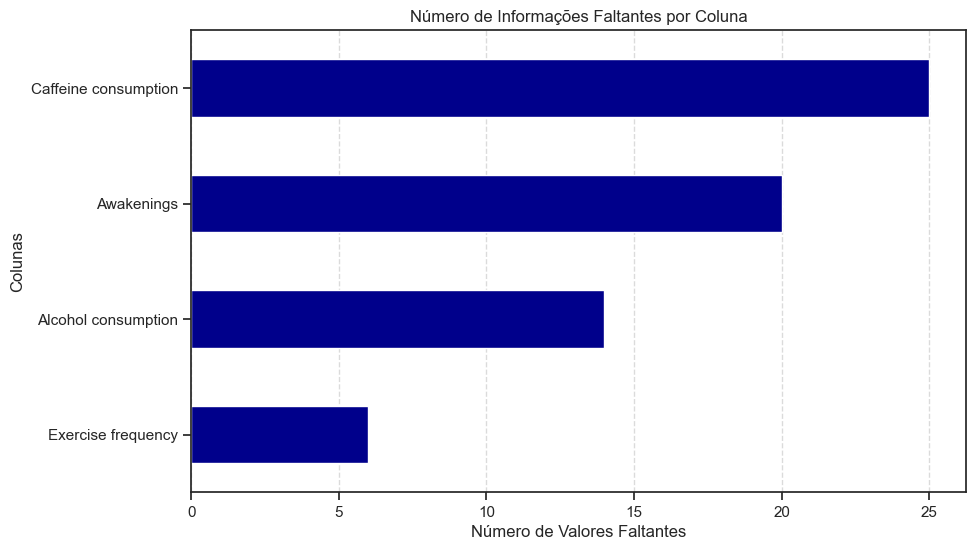

In [4]:
# Dados faltantes

# Calcular o número de valores faltantes por coluna
missing_values = df.isnull().sum()

# Filtrar apenas colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Ordenar do menor para o maior número de faltantes
missing_values = missing_values.sort_values()

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
missing_values.plot(kind='barh', color='darkblue')
plt.title('Número de Informações Faltantes por Coluna')
plt.xlabel('Número de Valores Faltantes')
plt.ylabel('Colunas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 2. Perguntas de partida e hipóteses

In [5]:
dict = pd.read_csv('../data/external/dictionary.csv')
dict

,variavel,descricao,tipo,subtipo
0,ID,Identificador único do indivíduo testado,quantitativa,discreta
1,Age,"Idade do indivíduo testado, em anos",quantitativa,discreta
2,Gender,Gênero do indivíduo testado,qualitativa,nominal
3,Bedtime,Horário em que o indivíduo testado vai para a ...,quantitativa,contínua
4,Wakeup time,Horário em que o indivíduo testado acorda toda...,quantitativa,contínua
5,Sleep duration,Quantidade total de tempo que o indivíduo test...,quantitativa,contínua
6,Sleep efficiency,Proporção de tempo na cama gasto dormindo,quantitativa,contínua
7,REM sleep percentage,Percentual do tempo total gasto em sono REM,quantitativa,discreta
8,Deep sleep percentage,Percentual do tempo total gasto em sono profundo,quantitativa,discreta
9,Light sleep percentage,Percentual do tempo total gasto em sono leve,quantitativa,discreta


1. **Pergunta:** Existe uma relação entre a idade dos indivíduos e a eficiência do sono?
   - **Hipótese:** A idade dos indivíduos influencia a eficiência do sono, com a expectativa de que a eficiência do sono diminua com o aumento da idade.

2. **Pergunta:** O consumo de cafeína afeta a eficiência do sono dos indivíduos testados?
   - **Hipótese:** Indivíduos que consomem mais cafeína têm uma menor eficiência do sono.

3. **Pergunta:** Há uma associação entre o horário em que os indivíduos vão para a cama e o percentual de sono REM?
   - **Hipótese:** O horário de dormir está relacionado ao percentual de sono REM, com a expectativa de que dormir mais tarde esteja associado a um menor percentual de sono REM.

4. **Pergunta:** A frequência de exercícios dos indivíduos está correlacionada com a duração total do sono?
   - **Hipótese:** Indivíduos que exercitam-se com mais frequência têm uma maior duração total de sono.

5. **Pergunta:** O consumo de álcool influencia o número de despertares durante a noite?
   - **Hipótese:** A quantidade de álcool consumido está associada a um maior número de despertares durante a noite.

6. **Pergunta:** Existe uma diferença no percentual de sono profundo entre diferentes gêneros?
   - **Hipótese:** O gênero dos indivíduos afeta o percentual de sono profundo, com a expectativa de diferenças significativas entre os gêneros.

7. **Pergunta:** Fumantes têm uma menor duração de sono em comparação com não fumantes?
   - **Hipótese:** Indivíduos que fumam têm uma menor duração de sono em comparação com aqueles que não fumam.


## 3. Insights

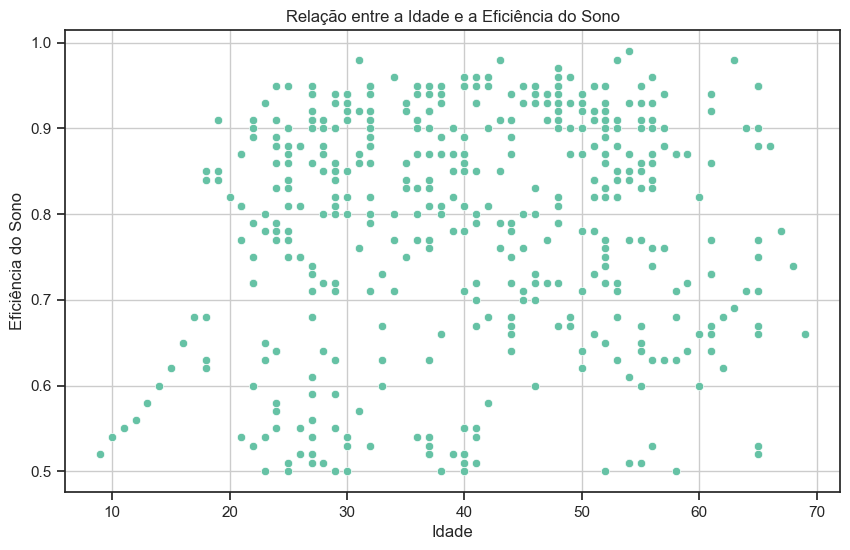

In [6]:
# 1. Relação entre a idade e a eficiência do sono

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Relação entre a Idade e a Eficiência do Sono')
plt.xlabel('Idade')
plt.ylabel('Eficiência do Sono')
plt.grid(True)
plt.show()

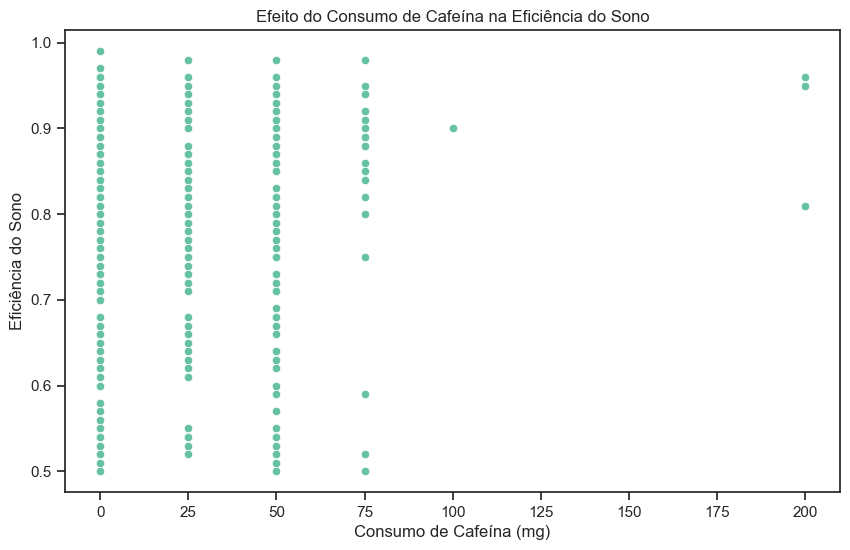

In [7]:
# 2. Efeito do consumo de cafeína na eficiência do sono
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine consumption', y='Sleep efficiency', data=df)
plt.title('Efeito do Consumo de Cafeína na Eficiência do Sono')
plt.xlabel('Consumo de Cafeína (mg)')
plt.ylabel('Eficiência do Sono')
plt.show()

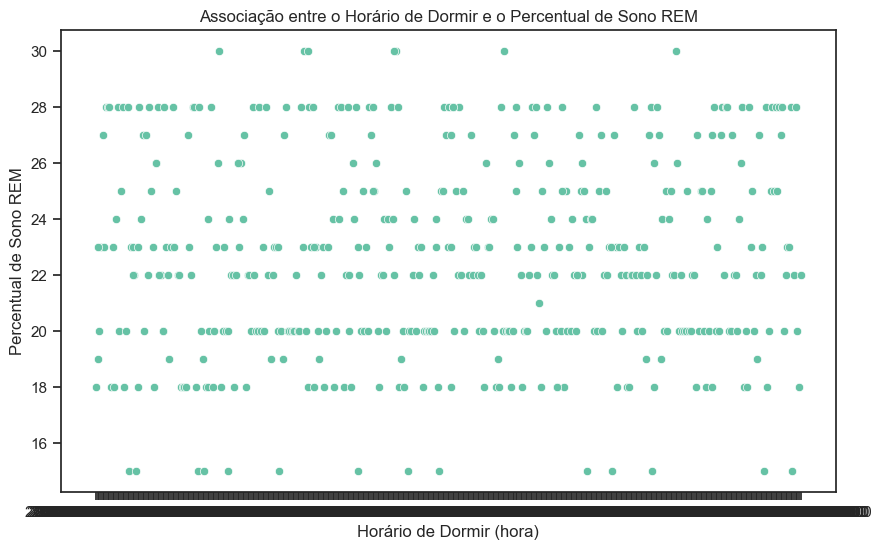

In [8]:
# 3. Associação entre o horário de dormir e o percentual de sono REM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedtime', y='REM sleep percentage', data=df)
plt.title('Associação entre o Horário de Dormir e o Percentual de Sono REM')
plt.xlabel('Horário de Dormir (hora)')
plt.ylabel('Percentual de Sono REM')
plt.show()

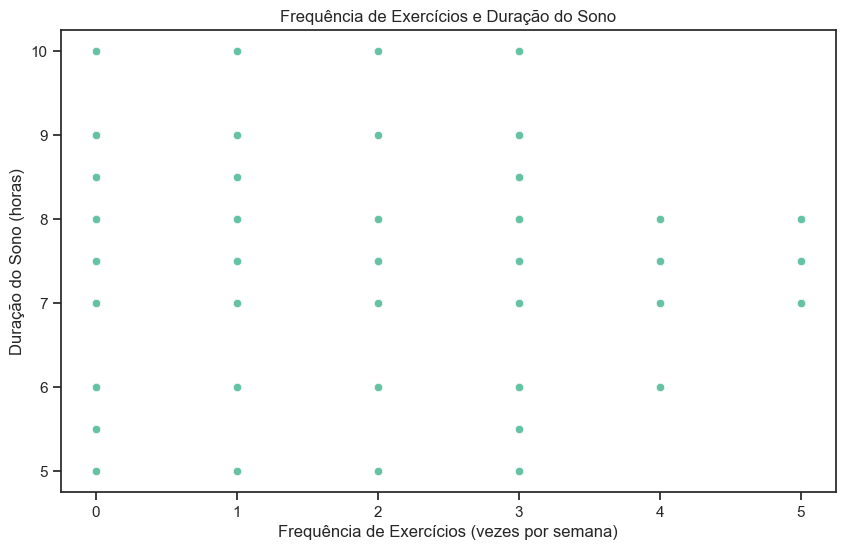

In [9]:
# 4. Frequência de exercícios e duração do sono
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exercise frequency', y='Sleep duration', data=df)
plt.title('Frequência de Exercícios e Duração do Sono')
plt.xlabel('Frequência de Exercícios (vezes por semana)')
plt.ylabel('Duração do Sono (horas)')
plt.show()

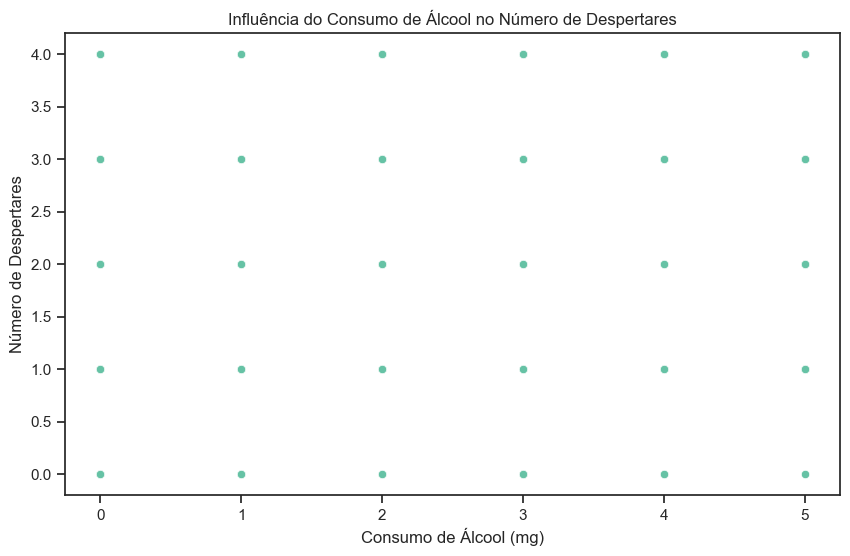

In [10]:
# 5. Influência do consumo de álcool no número de despertares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol consumption', y='Awakenings', data=df)
plt.title('Influência do Consumo de Álcool no Número de Despertares')
plt.xlabel('Consumo de Álcool (mg)')
plt.ylabel('Número de Despertares')
plt.show()

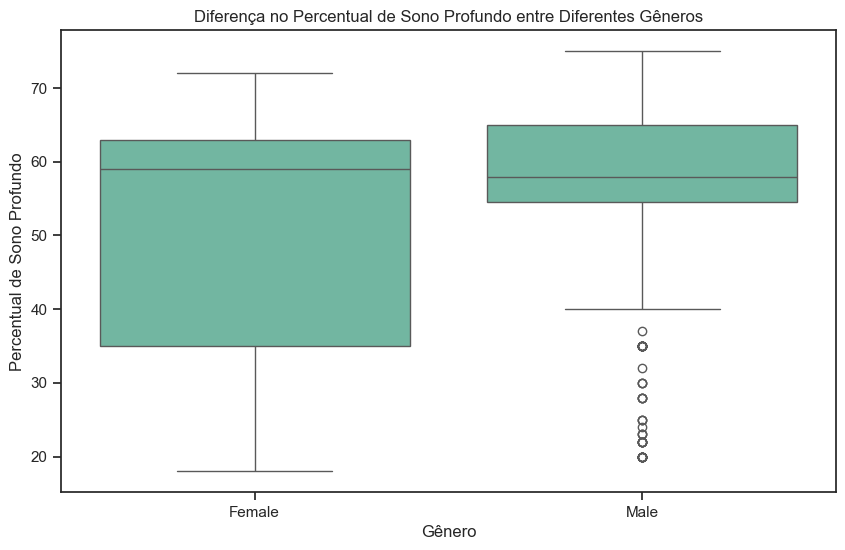

In [11]:
# 6. Diferença no percentual de sono profundo entre diferentes gêneros
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Deep sleep percentage', data=df)
plt.title('Diferença no Percentual de Sono Profundo entre Diferentes Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Percentual de Sono Profundo')
plt.show()

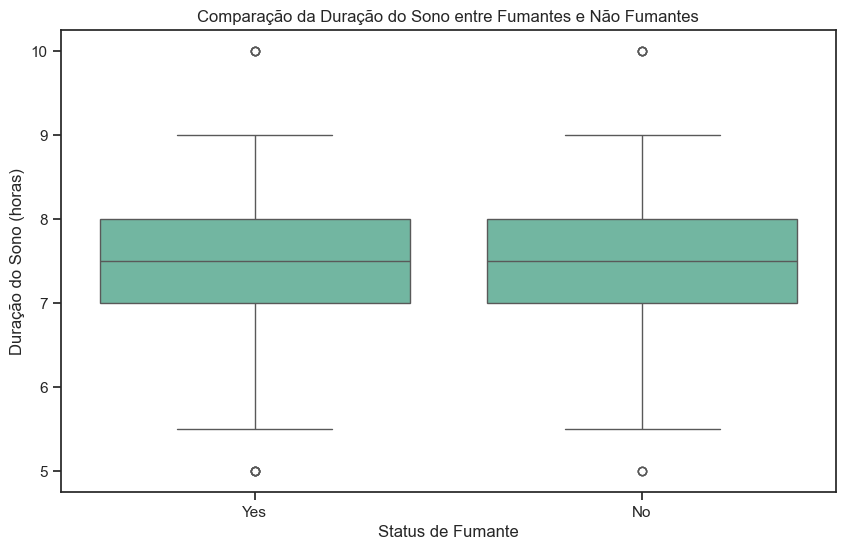

In [12]:
# 7. Comparação da duração do sono entre fumantes e não fumantes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking status', y='Sleep duration', data=df)
plt.title('Comparação da Duração do Sono entre Fumantes e Não Fumantes')
plt.xlabel('Status de Fumante')
plt.ylabel('Duração do Sono (horas)')
plt.show()